In [1]:
"""
Name: Ciaran Cooney
Date: 10/05/2019
Description: Simple vizualisations of time and distance data for EY Next Wave Challenge.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data_train/all_features.csv')
df.head()

,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,dist,net_tr,prev_tr,x_home,y_home,nj,dist_pct_ch,j_time
0,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,0.000000,0.000000,0.000000,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,45797.982227,99463.898797,3544.948847,3.751014e+06,-1.909398e+07,6.0,-0.071843,962.0
1,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,29603.985176,-1056.813994,270.043451,3.749450e+06,-1.926506e+07,4.0,-0.009039,1756.0
2,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,-1.914258e+07,137051.659155,-1867.319643,-1867.319643,3.771461e+06,-1.910413e+07,2.0,0.013813,2716.0
3,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,0.000000,0.000000,0.000000,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,61336.955341,5460.552001,-59655.060438,3.765544e+06,-1.917227e+07,9.0,35.468958,0.0
4,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,0.000000,0.000000,0.000000,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,17851.785279,-7113.420678,0.000000,3.760336e+06,-1.922818e+07,8.0,0.000000,0.0


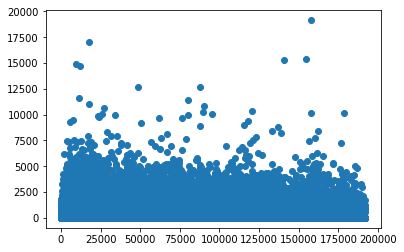

In [8]:
"""
Plot distance vs. time to determine if their are any
outliers.
"""
x = df["dist"]
y = df["j_time"]
plt.scatter(x,y)
plt.show()

In [12]:
"""
Replace any negative values for mean velocity with 0.
"""
df["vmean"][df["vmean"] < 0] = 0

Text(0,0.5,'Frequency')

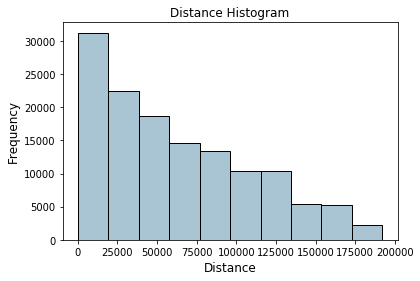

In [13]:
"""
Plot the distance traveled per journey in a 10-bin histogram.
"""
fig, ax = plt.subplots()
df['dist'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Distance Histogram', fontsize=12)
ax.set_xlabel('Distance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [16]:
"""
Create custom bins for the distance data so that each point is categorised
accordingly. The categorised data can then be used for classification.
"""
bin_ranges = [0,30000,60000,90000,120000,150000,180000,210000]
bin_names = [1, 2, 3, 4, 5, 6, 7]

df['bin_custom_range'] = pd.cut(np.array(df['dist']), bins=bin_ranges)
df['bin_custom_label'] = pd.cut(np.array(df['dist']), bins=bin_ranges, labels=bin_names)

df.head()

,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,dist,net_tr,prev_tr,x_home,y_home,nj,dist_pct_ch,j_time,bin_custom_range,bin_custom_label
0,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,0.000000,0.000000,0.000000,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,45797.982227,99463.898797,3544.948847,3.751014e+06,-1.909398e+07,6.0,-0.071843,962.0,"(30000, 60000]",2
1,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,29603.985176,-1056.813994,270.043451,3.749450e+06,-1.926506e+07,4.0,-0.009039,1756.0,"(0, 30000]",1
2,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,-1.914258e+07,137051.659155,-1867.319643,-1867.319643,3.771461e+06,-1.910413e+07,2.0,0.013813,2716.0,"(120000, 150000]",5
3,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,0.000000,0.000000,0.000000,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,61336.955341,5460.552001,-59655.060438,3.765544e+06,-1.917227e+07,9.0,35.468958,0.0,"(60000, 90000]",3
4,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,0.000000,0.000000,0.000000,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,17851.785279,-7113.420678,0.000000,3.760336e+06,-1.922818e+07,8.0,0.000000,0.0,"(0, 30000]",1


Text(0,0.5,'Frequency')

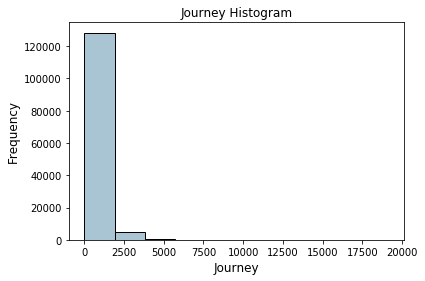

In [17]:
fig, ax = plt.subplots()
df['j_time'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Journey Histogram', fontsize=12)
ax.set_xlabel('Journey', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [23]:
bin_ranges = [-1,2000,4000,6000,8000,10000,12000,14000,16000,18000,21000]
bin_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['bin_j_custom_range'] = pd.cut(np.array(df['j_time']), bins=bin_ranges)
df['bin_j_custom_label'] = pd.cut(np.array(df['j_time']), bins=bin_ranges, labels=bin_names)

df.head()

,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,...,prev_tr,x_home,y_home,nj,dist_pct_ch,j_time,bin_custom_range,bin_custom_label,bin_j_custom_range,bin_j_custom_label
0,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,0.000000,0.000000,0.000000,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,...,3544.948847,3.751014e+06,-1.909398e+07,6.0,-0.071843,962.0,"(30000, 60000]",2,"(-1, 2000]",1
1,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,...,270.043451,3.749450e+06,-1.926506e+07,4.0,-0.009039,1756.0,"(0, 30000]",1,"(-1, 2000]",1
2,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,-1.914258e+07,...,-1867.319643,3.771461e+06,-1.910413e+07,2.0,0.013813,2716.0,"(120000, 150000]",5,"(2000, 4000]",2
3,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,0.000000,0.000000,0.000000,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,...,-59655.060438,3.765544e+06,-1.917227e+07,9.0,35.468958,0.0,"(60000, 90000]",3,"(-1, 2000]",1
4,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,0.000000,0.000000,0.000000,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,...,0.000000,3.760336e+06,-1.922818e+07,8.0,0.000000,0.0,"(0, 30000]",1,"(-1, 2000]",1
